In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split
from unet import UNet
from diffusion import Diffusion
from train import train_model, plot_images
import torch.nn as nn
from ema import EMA
from utills import load_checkpoint


In [2]:
torch.set_float32_matmul_precision('high')
batch_size = 256
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_epochs = 50
train_ratio = 0.8
base_dim = 64
timesteps = 1000
img_size = 32
img_channels = 3
lr = 1e-4


In [3]:
transform = transforms.Compose([
    transforms.Resize((img_size,img_size)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = datasets.ImageFolder(root='./celeba', transform=transform)
train_size = int(train_ratio*(len(dataset)))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(
        train_dataset,
        batch_size = batch_size,
        shuffle = True,
        num_workers = 4,
        pin_memory = True,
        persistent_workers = True
)
test_loader = DataLoader(
        test_dataset,
        batch_size = batch_size,
        shuffle = False,
        num_workers = 4,
        pin_memory = True,
        persistent_workers = True
)

Evaluating: 100%|██████████| 159/159 [00:25<00:00,  6.17it/s]


Epoch: 1/50 train loss: 0.1411 | eval loss: 0.0509


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.52it/s]


Epoch: 2/50 train loss: 0.0542 | eval loss: 0.0424


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.10it/s]


Epoch: 3/50 train loss: 0.0470 | eval loss: 0.0395


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.27it/s]


Epoch: 4/50 train loss: 0.0440 | eval loss: 0.0381


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.51it/s]


Epoch: 5/50 train loss: 0.0421 | eval loss: 0.0375


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.40it/s]


Epoch: 6/50 train loss: 0.0407 | eval loss: 0.0366


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 22.06it/s]


Epoch: 7/50 train loss: 0.0393 | eval loss: 0.0354


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.67it/s]


Epoch: 8/50 train loss: 0.0392 | eval loss: 0.0364


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.47it/s]


Epoch: 9/50 train loss: 0.0385 | eval loss: 0.0356


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.35it/s]


Epoch: 10/50 train loss: 0.0375 | eval loss: 0.0351


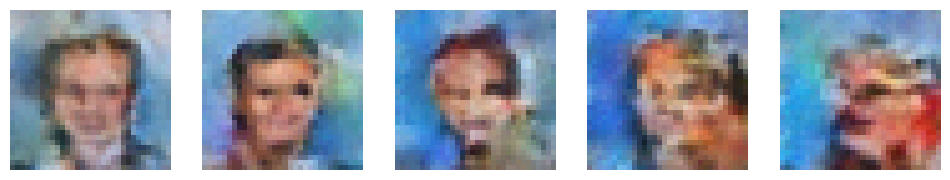

Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.47it/s]


Epoch: 11/50 train loss: 0.0376 | eval loss: 0.0345


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.48it/s]


Epoch: 12/50 train loss: 0.0368 | eval loss: 0.0347


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.66it/s]


Epoch: 13/50 train loss: 0.0369 | eval loss: 0.0341


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.06it/s]


Epoch: 14/50 train loss: 0.0364 | eval loss: 0.0338


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.58it/s]


Epoch: 15/50 train loss: 0.0367 | eval loss: 0.0345


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.46it/s]


Epoch: 16/50 train loss: 0.0363 | eval loss: 0.0336


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 20.98it/s]


Epoch: 17/50 train loss: 0.0364 | eval loss: 0.0339


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.24it/s]


Epoch: 18/50 train loss: 0.0362 | eval loss: 0.0338


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.46it/s]


Epoch: 19/50 train loss: 0.0363 | eval loss: 0.0340


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.00it/s]


Epoch: 20/50 train loss: 0.0358 | eval loss: 0.0336


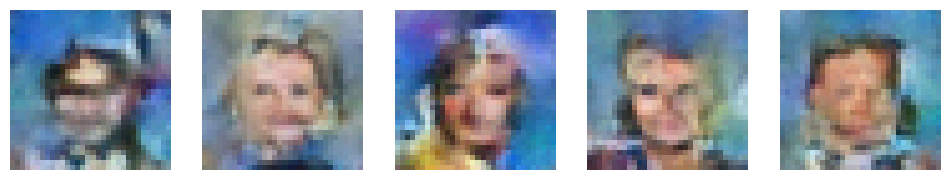

Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.76it/s]


Epoch: 21/50 train loss: 0.0357 | eval loss: 0.0333


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.10it/s]


Epoch: 22/50 train loss: 0.0360 | eval loss: 0.0331


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.42it/s]


Epoch: 23/50 train loss: 0.0359 | eval loss: 0.0337


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.47it/s]


Epoch: 24/50 train loss: 0.0359 | eval loss: 0.0337


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.01it/s]


Epoch: 25/50 train loss: 0.0356 | eval loss: 0.0341


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.75it/s]


Epoch: 26/50 train loss: 0.0358 | eval loss: 0.0335


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.33it/s]


Epoch: 27/50 train loss: 0.0359 | eval loss: 0.0333


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.08it/s]


Epoch: 28/50 train loss: 0.0360 | eval loss: 0.0337


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 22.03it/s]


Epoch: 29/50 train loss: 0.0357 | eval loss: 0.0339


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.57it/s]


Epoch: 30/50 train loss: 0.0356 | eval loss: 0.0337


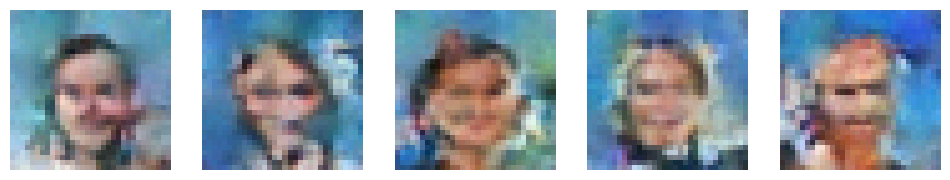

Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.37it/s]


Epoch: 31/50 train loss: 0.0356 | eval loss: 0.0332


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.78it/s]


Epoch: 32/50 train loss: 0.0355 | eval loss: 0.0336


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.35it/s]


Epoch: 33/50 train loss: 0.0355 | eval loss: 0.0334


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.75it/s]


Epoch: 34/50 train loss: 0.0354 | eval loss: 0.0334


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.45it/s]


Epoch: 35/50 train loss: 0.0358 | eval loss: 0.0333


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.21it/s]


Epoch: 36/50 train loss: 0.0356 | eval loss: 0.0340


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.55it/s]


Epoch: 37/50 train loss: 0.0357 | eval loss: 0.0337


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.55it/s]


Epoch: 38/50 train loss: 0.0357 | eval loss: 0.0338


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.57it/s]


Epoch: 39/50 train loss: 0.0353 | eval loss: 0.0332


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.52it/s]


Epoch: 40/50 train loss: 0.0354 | eval loss: 0.0337


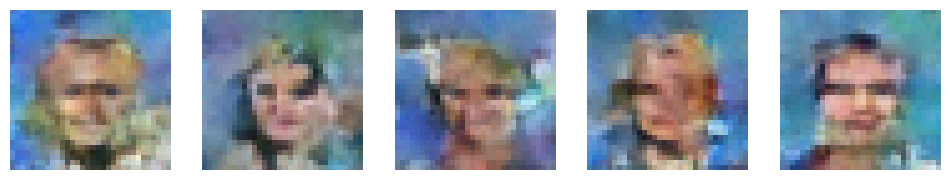

Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.83it/s]


Epoch: 41/50 train loss: 0.0356 | eval loss: 0.0326


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.69it/s]


Epoch: 42/50 train loss: 0.0354 | eval loss: 0.0337


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.74it/s]


Epoch: 43/50 train loss: 0.0359 | eval loss: 0.0335


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.44it/s]


Epoch: 44/50 train loss: 0.0353 | eval loss: 0.0337


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.90it/s]


Epoch: 45/50 train loss: 0.0353 | eval loss: 0.0333


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.61it/s]


Epoch: 46/50 train loss: 0.0356 | eval loss: 0.0334


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.05it/s]


Epoch: 47/50 train loss: 0.0353 | eval loss: 0.0327


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.45it/s]


Epoch: 48/50 train loss: 0.0352 | eval loss: 0.0334


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 20.74it/s]


Epoch: 49/50 train loss: 0.0355 | eval loss: 0.0336


Evaluating: 100%|██████████| 159/159 [00:07<00:00, 21.33it/s]


Epoch: 50/50 train loss: 0.0353 | eval loss: 0.0336


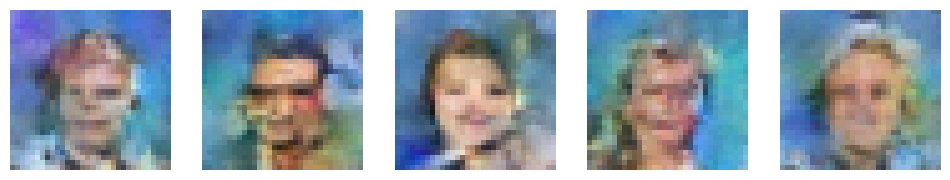

In [4]:
diffusion = Diffusion(timesteps=timesteps, img_size = img_size, img_channels = img_channels, device = device)
model = UNet(base_dim = 64)
model.to(device)
ema = EMA(model, 0.999)
optimizer = torch.optim.AdamW(params = model.parameters(), lr = lr)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer, 
    T_max=n_epochs, 
    eta_min=1e-6
)
loss_fn = nn.MSELoss()
train_model(model, diffusion, optimizer, train_loader, test_loader, loss_fn, scheduler, n_epochs, ema)

In [6]:
model = UNet(base_dim = 128)
model.to(device)
ema = EMA(model = model, beta = 0.999)
optimizer = torch.optim.AdamW(params = model.parameters(), lr = lr)

load_checkpoint("checkpoints/weights_49_epoch.pth", model, optimizer, ema, device)


Evaluating: 100%|██████████| 159/159 [00:35<00:00,  4.48it/s]


Epoch: 1/50 train loss: 0.0192 | eval loss: 0.0183


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.65it/s]


Epoch: 2/50 train loss: 0.0189 | eval loss: 0.0185


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.53it/s]


Epoch: 3/50 train loss: 0.0189 | eval loss: 0.0183


Evaluating: 100%|██████████| 159/159 [00:11<00:00, 14.29it/s]


Epoch: 4/50 train loss: 0.0189 | eval loss: 0.0181


Evaluating: 100%|██████████| 159/159 [00:11<00:00, 14.37it/s]


Epoch: 5/50 train loss: 0.0190 | eval loss: 0.0179


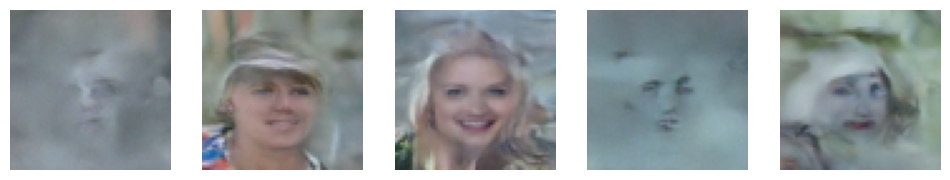

Evaluating: 100%|██████████| 159/159 [00:11<00:00, 14.33it/s]


Epoch: 6/50 train loss: 0.0187 | eval loss: 0.0181


Evaluating: 100%|██████████| 159/159 [00:11<00:00, 14.43it/s]


Epoch: 7/50 train loss: 0.0187 | eval loss: 0.0177


Evaluating: 100%|██████████| 159/159 [00:11<00:00, 14.20it/s]


Epoch: 8/50 train loss: 0.0187 | eval loss: 0.0179


Evaluating: 100%|██████████| 159/159 [00:11<00:00, 14.39it/s]


Epoch: 9/50 train loss: 0.0186 | eval loss: 0.0183


Evaluating: 100%|██████████| 159/159 [00:11<00:00, 14.39it/s]


Epoch: 10/50 train loss: 0.0186 | eval loss: 0.0183


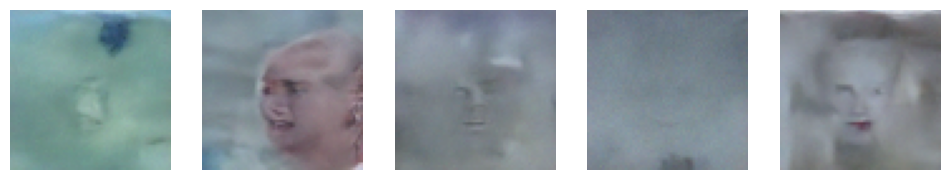

Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.49it/s]


Epoch: 11/50 train loss: 0.0186 | eval loss: 0.0180


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.52it/s]


Epoch: 12/50 train loss: 0.0184 | eval loss: 0.0183


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.47it/s]


Epoch: 13/50 train loss: 0.0185 | eval loss: 0.0180


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.64it/s]


Epoch: 14/50 train loss: 0.0185 | eval loss: 0.0179


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.65it/s]


Epoch: 15/50 train loss: 0.0184 | eval loss: 0.0178


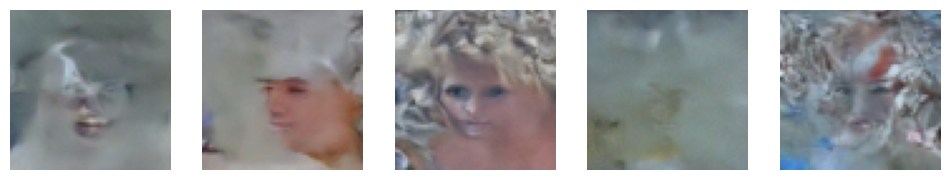

Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.71it/s]


Epoch: 16/50 train loss: 0.0187 | eval loss: 0.0177


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.67it/s]


Epoch: 17/50 train loss: 0.0184 | eval loss: 0.0178


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.66it/s]


Epoch: 18/50 train loss: 0.0184 | eval loss: 0.0180


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.63it/s]


Epoch: 19/50 train loss: 0.0183 | eval loss: 0.0176


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.67it/s]


Epoch: 20/50 train loss: 0.0185 | eval loss: 0.0180


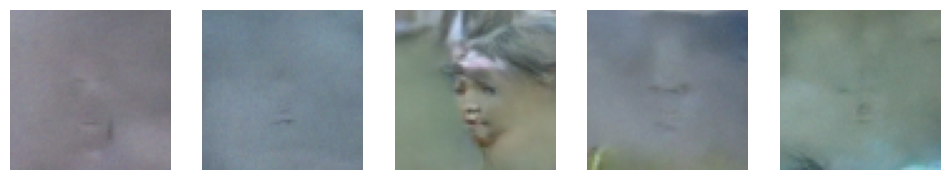

Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.70it/s]


Epoch: 21/50 train loss: 0.0184 | eval loss: 0.0180


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.65it/s]


Epoch: 22/50 train loss: 0.0183 | eval loss: 0.0178


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.67it/s]


Epoch: 23/50 train loss: 0.0184 | eval loss: 0.0180


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.75it/s]


Epoch: 24/50 train loss: 0.0183 | eval loss: 0.0181


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.70it/s]


Epoch: 25/50 train loss: 0.0183 | eval loss: 0.0177


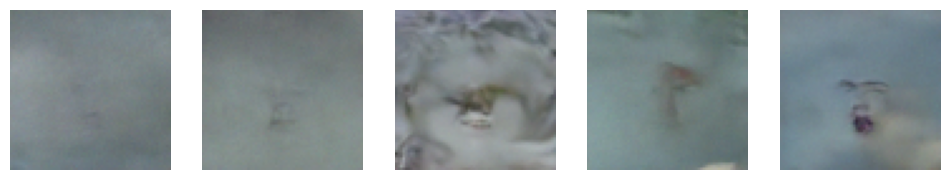

Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.66it/s]


Epoch: 26/50 train loss: 0.0181 | eval loss: 0.0178


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.69it/s]


Epoch: 27/50 train loss: 0.0180 | eval loss: 0.0182


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.66it/s]


Epoch: 28/50 train loss: 0.0181 | eval loss: 0.0178


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.75it/s]


Epoch: 29/50 train loss: 0.0181 | eval loss: 0.0178


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.70it/s]


Epoch: 30/50 train loss: 0.0180 | eval loss: 0.0179


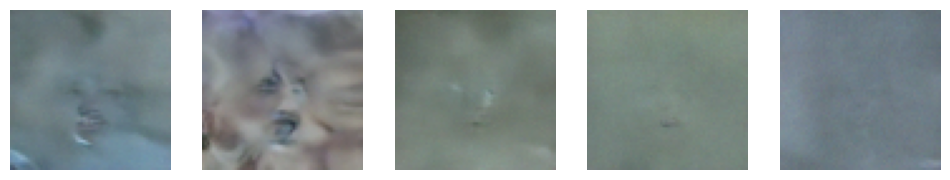

Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.69it/s]


Epoch: 31/50 train loss: 0.0180 | eval loss: 0.0170


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.78it/s]


Epoch: 32/50 train loss: 0.0181 | eval loss: 0.0178


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.69it/s]


Epoch: 33/50 train loss: 0.0179 | eval loss: 0.0179


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.68it/s]


Epoch: 34/50 train loss: 0.0180 | eval loss: 0.0178


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.65it/s]


Epoch: 35/50 train loss: 0.0181 | eval loss: 0.0180


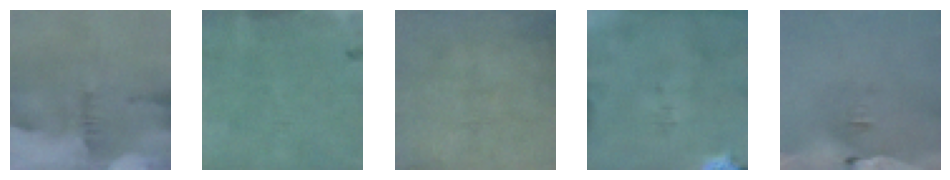

Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.71it/s]


Epoch: 36/50 train loss: 0.0178 | eval loss: 0.0177


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.73it/s]


Epoch: 37/50 train loss: 0.0180 | eval loss: 0.0174


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.73it/s]


Epoch: 38/50 train loss: 0.0179 | eval loss: 0.0177


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.62it/s]


Epoch: 39/50 train loss: 0.0178 | eval loss: 0.0178


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.61it/s]


Epoch: 40/50 train loss: 0.0179 | eval loss: 0.0172


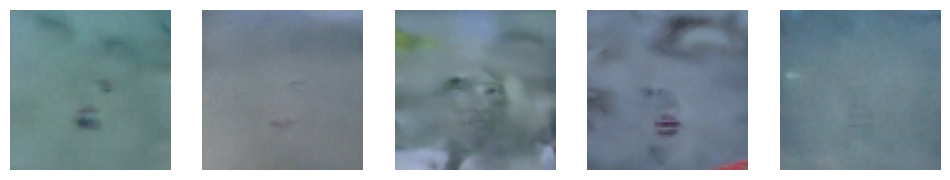

Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.48it/s]


Epoch: 41/50 train loss: 0.0180 | eval loss: 0.0179


Evaluating: 100%|██████████| 159/159 [00:10<00:00, 14.50it/s]


Epoch: 42/50 train loss: 0.0180 | eval loss: 0.0175


Training:  11%|█         | 69/634 [00:16<02:17,  4.10it/s]


KeyboardInterrupt: 

In [7]:
diffusion = Diffusion(timesteps=timesteps, img_size = img_size, img_channels = img_channels, device = device)
loss_fn = nn.MSELoss()
train_model(model, diffusion, optimizer, train_loader, test_loader, loss_fn, n_epochs, ema)

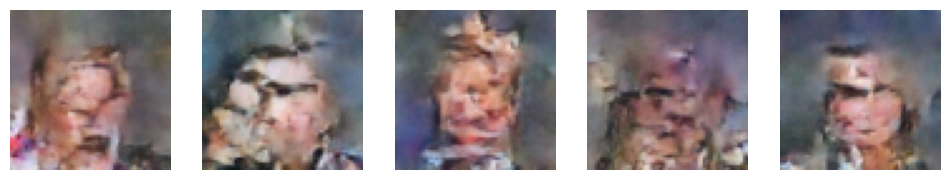

In [12]:
model = UNet(base_dim=128)
model.to(device)
ema = EMA(model, 0.999)
optimizer = torch.optim.AdamW(params = model.parameters(), lr = lr)
load_checkpoint("checkpoints/weights_30_epoch.pth", model, optimizer, ema, device)
diffusion = Diffusion(timesteps=timesteps, img_size = img_size, img_channels = img_channels, device = device)
ema.apply_shadow()
imgs = diffusion.sample_img(model, 5)
plot_images(imgs)
ema.restore()

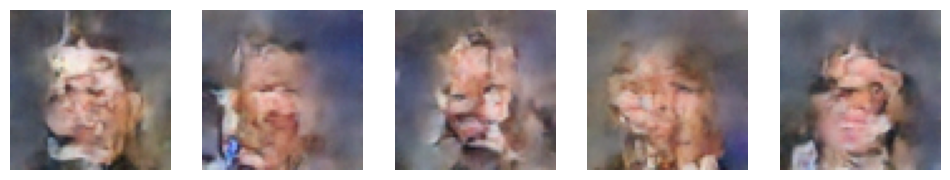